In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from sklearn.tree import plot_tree
from scipy import stats

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

In [158]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [80]:
df.isnull().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

In [ ]:
# recreate our time of day values
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

In [ ]:
df['hour'] = df['Transaction Date and Time'].apply(lambda x:x.hour)

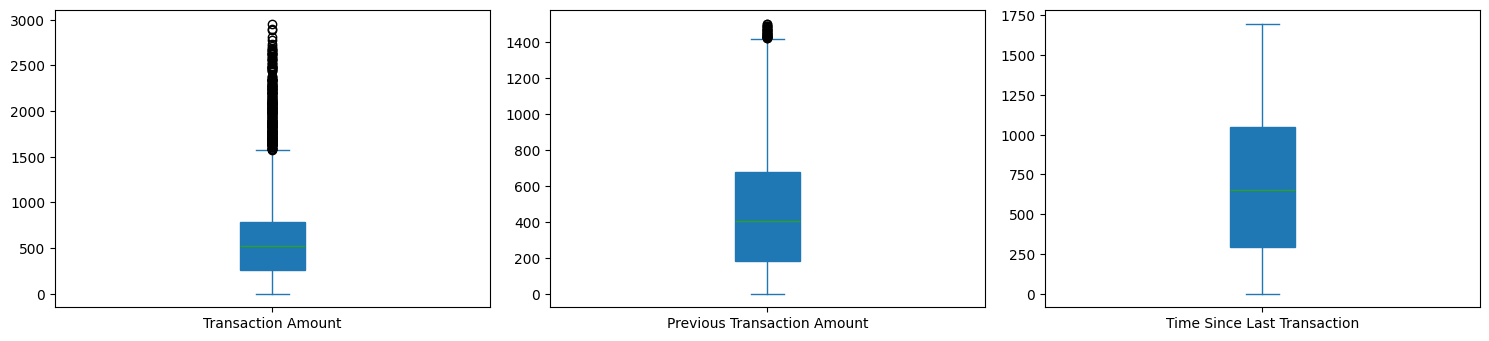

In [159]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Transaction Amount',
       'Previous Transaction Amount', 'Time Since Last Transaction'
       ]

# Create boxplots for each specified variable
df[variables_of_interest].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [162]:
# Define the numeric features and the target variable
numeric_features = ['Transaction Amount',
       'Previous Transaction Amount', 'Time Since Last Transaction','hour']
target = 'Fraud'

# Convert 'Attrition' to binary numerical values
df[target] = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform t-tests for each numeric feature
t_test_results = []
for feature in numeric_features:
    no_attrition = df[df[target] == 0][feature]
    yes_attrition = df[df[target] == 1][feature]
    t_stat, p_value = ttest_ind(no_attrition, yes_attrition, equal_var=False)
    t_test_results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_value})

# Convert t-test results to DataFrame for better readability
t_test_df = pd.DataFrame(t_test_results)
print("T-test results for numeric features:\n", t_test_df)

T-test results for numeric features:
                        Feature  t-statistic        p-value
0           Transaction Amount   -22.903248   1.221210e-99
1  Previous Transaction Amount    27.705389  3.637688e-144
2  Time Since Last Transaction    30.804217  2.153793e-171
3                         hour    -0.513467   6.076852e-01


In [137]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

In [138]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Merchant Category'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(2.422844794447375), np.float64(0.6585028234725516))

In [139]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Location'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(469.5569492557882), np.float64(2.567486407847484e-100))

In [140]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Device Type'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(0.01652777685241005), np.float64(0.8977055011815493))

In [82]:
# transaction amount you henduo outlier suoyi keyizuo1 log
# previous transaction amount yetingduo kaolvyixia1

In [83]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [84]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

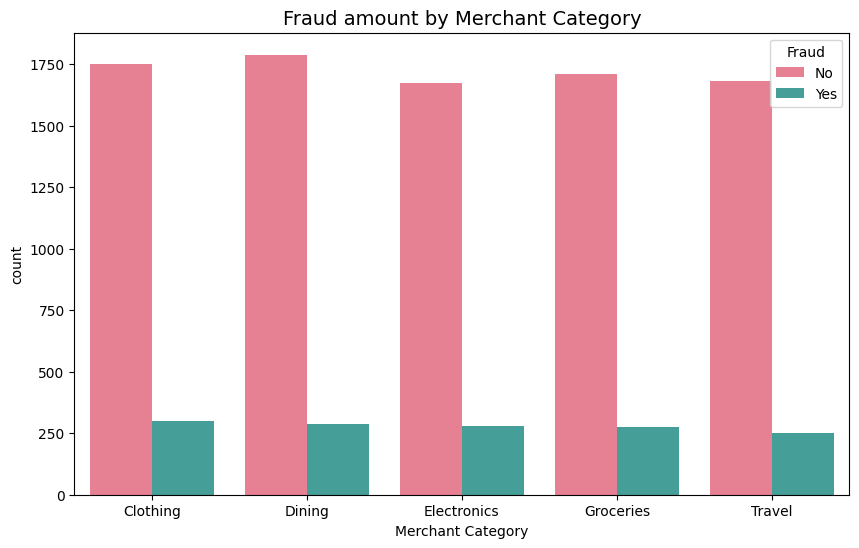

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Merchant Category', hue='Fraud', palette='husl')
plt.title('Fraud amount by Merchant Category', fontsize=14)
plt.show()

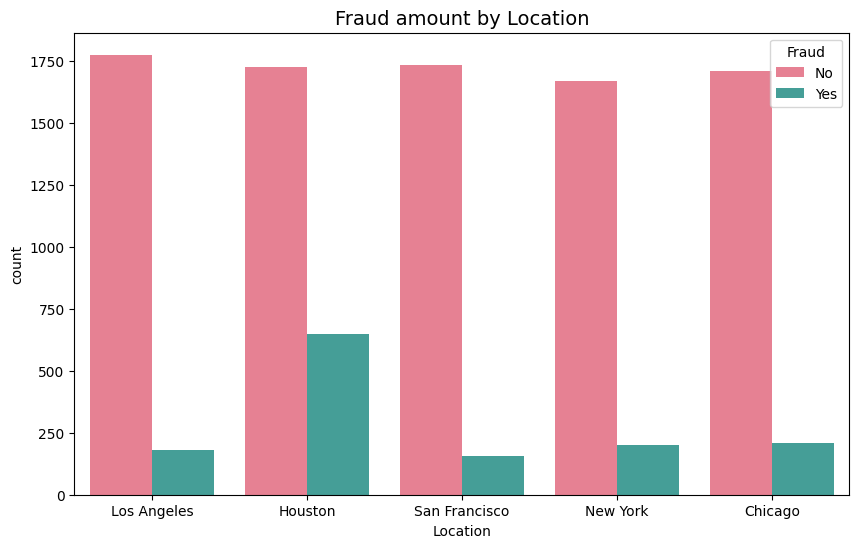

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Location', hue='Fraud', palette='husl')
plt.title('Fraud amount by Location', fontsize=14)
plt.show()

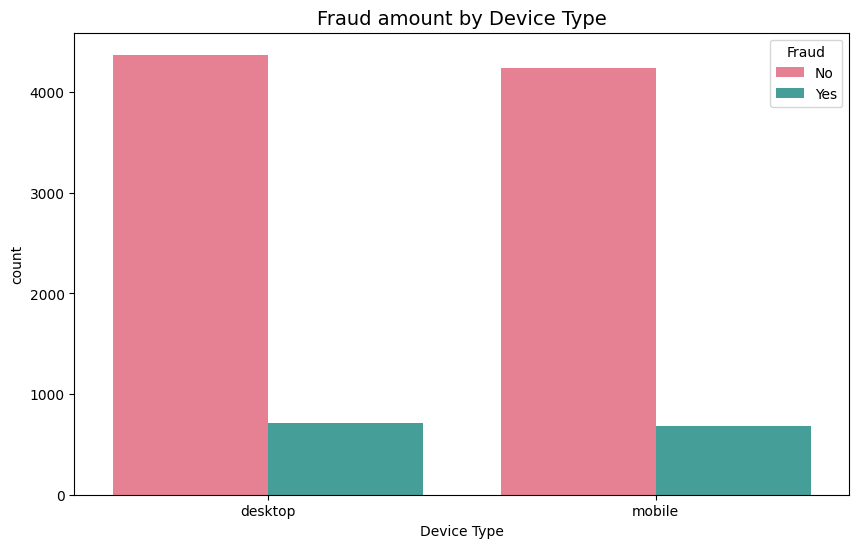

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Device Type', hue='Fraud', palette='husl')
plt.title('Fraud amount by Device Type', fontsize=14)
plt.show()

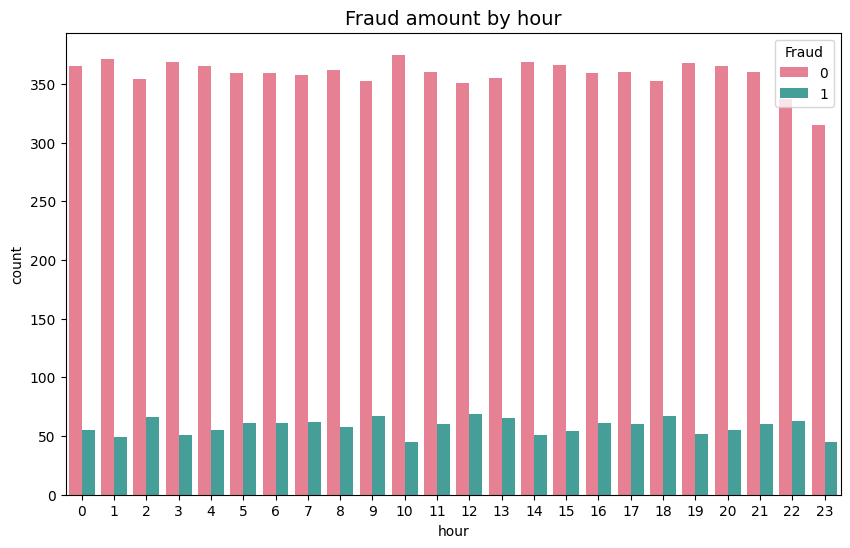

In [154]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour', hue='Fraud', palette='husl')
plt.title('Fraud amount by hour', fontsize=14)
plt.show()

In [89]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [90]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,2023-01-04 11:19:30,461.410984,677.040726
min,1.00000,1000.000000,1.000000,2023-01-01 00:00:00,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,2023-01-02 17:39:45,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,2023-01-04 11:19:30,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,2023-01-06 04:59:15,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,2023-01-07 22:39:00,1500.000000,1694.715674
std,2886.89568,1152.371939,399.984400,NaN,334.582413,432.386769


In [91]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

In [163]:
# Convert categorical data to numeric
Merchant_Category_le = LabelEncoder()
Location_le = LabelEncoder()
Device_Type_le = LabelEncoder()
Fraud_le = LabelEncoder()

df['Merchant Category'] = Merchant_Category_le.fit_transform(df['Merchant Category'])
df['Location'] = Location_le.fit_transform(df['Location'])
df['Device Type'] = Device_Type_le.fit_transform(df['Device Type'])
df['Fraud'] = Fraud_le.fit_transform(df['Fraud'])

In [164]:
df = df.drop(columns=['Transaction ID', 'Customer ID'])

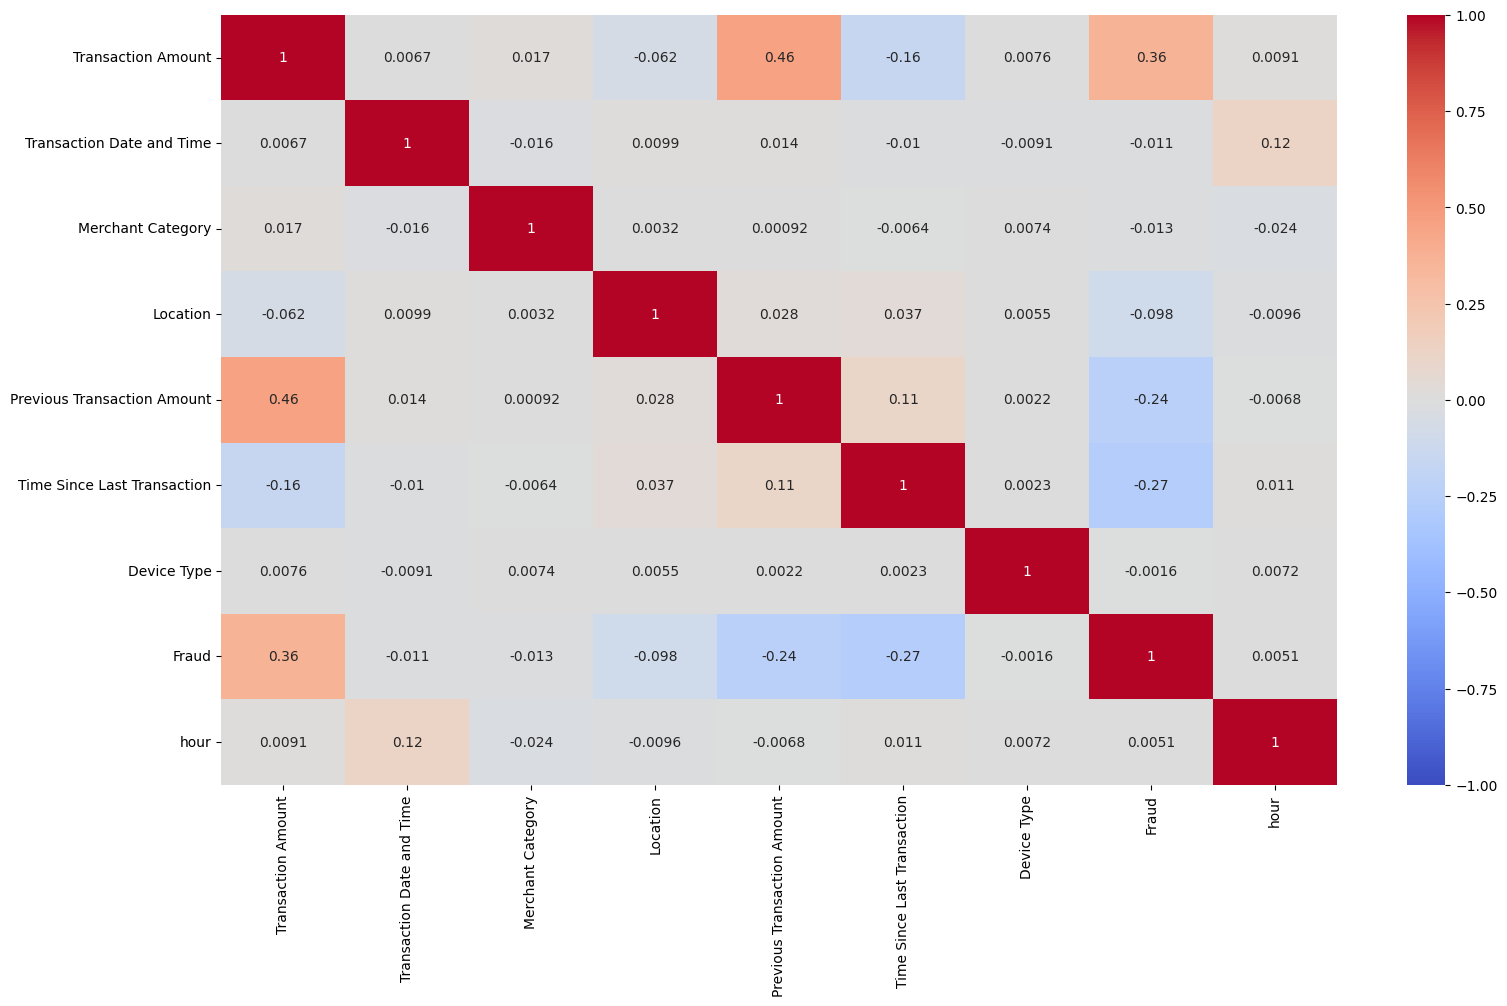

In [165]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

In [166]:
df.columns

Index(['Transaction Amount', 'Transaction Date and Time', 'Merchant Category',
       'Location', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Device Type', 'Fraud', 'hour'],
      dtype='object')

In [95]:
### Feature Engineering
#xianbuzuo



In [169]:
## helps in normalizing distributions that are highly skewed. 
##  This transformation can make the data more suitable for statistical analysis and modeling. (deal with outliers)


# Apply log transformation to 'Flight Distance' and 'Arrival Delay in Minutes'
df['Log_Transaction_Amount'] = np.log1p(df['Transaction Amount'])  # log1p is used to handle zero values by computing log(1 + x)
df['Log_Previous_Transaction_Amount'] = np.log1p(df['Previous Transaction Amount'])
# Drop the original 'Flight Distance' and 'Arrival Delay in Minutes' columns
#df = df.drop(columns=['Flight Distance'])

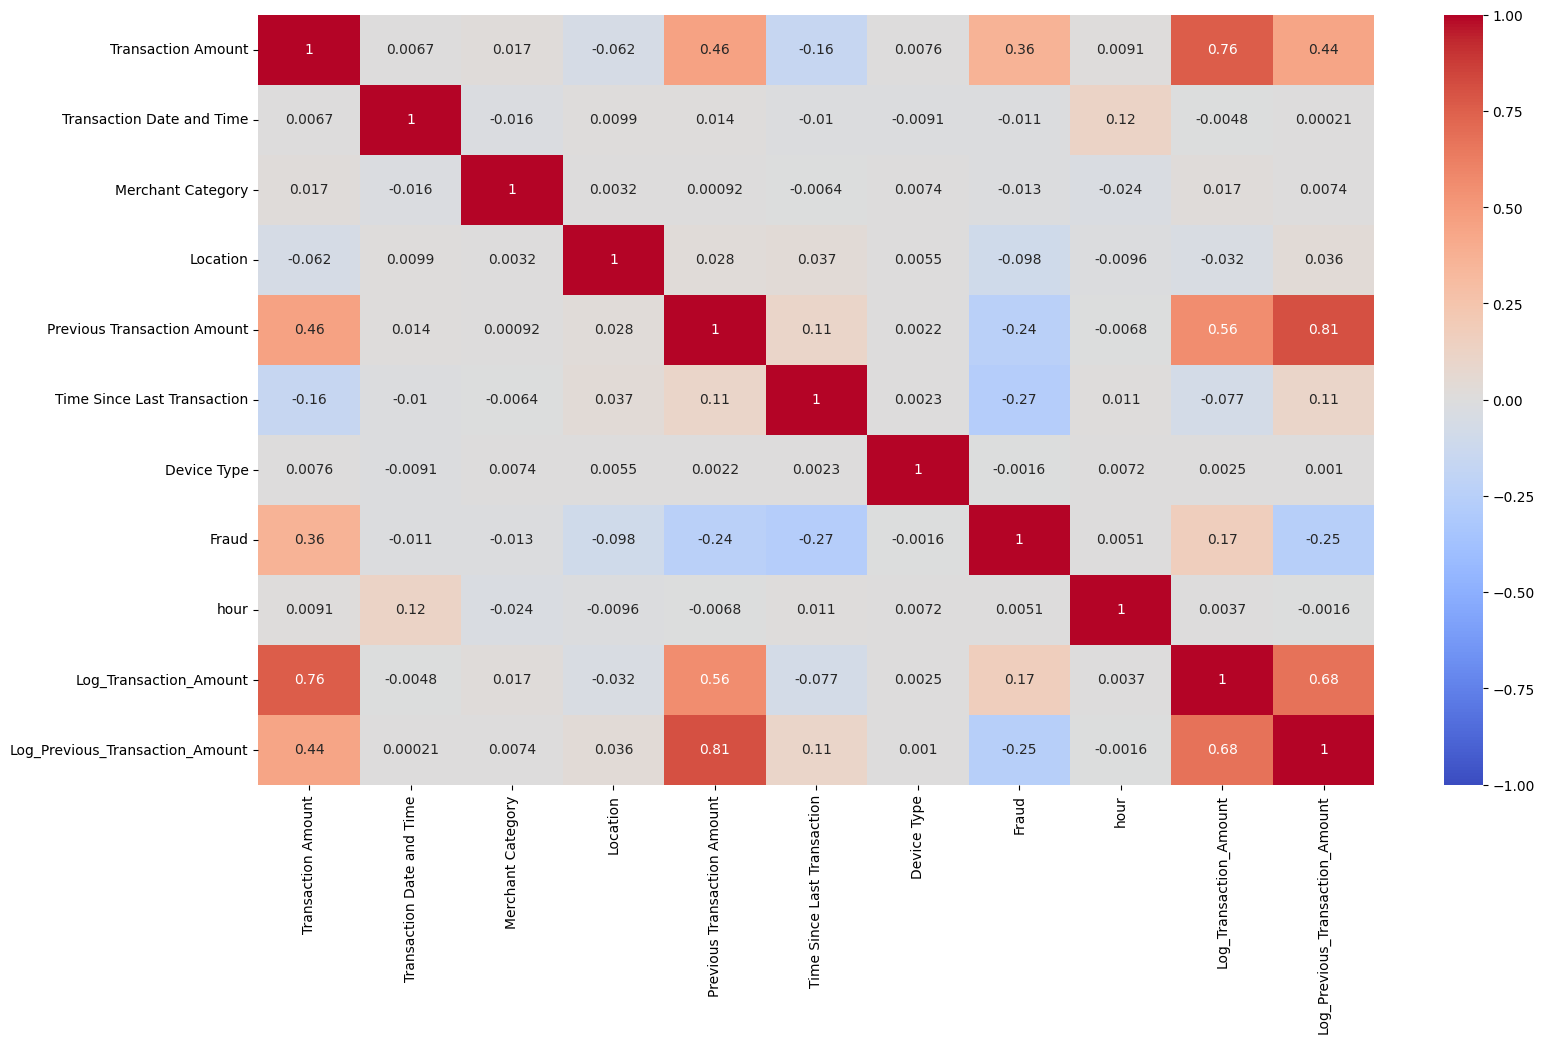

In [170]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

In [96]:
final_data = df

In [97]:
final_data.columns

Index(['Transaction Amount', 'Transaction Date and Time', 'Merchant Category',
       'Location', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Device Type', 'Fraud'],
      dtype='object')

In [98]:
### Modelling

In [99]:
## split data into X variables and y variable

X = final_data[[ 'Transaction Amount', 'Merchant Category',
       'Location', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Device Type' ]]
y = final_data['Fraud']

In [100]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [101]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(final_data[['Transaction Amount',  
       'Previous Transaction Amount',
       'Time Since Last Transaction']])

array([[0.22297057, 0.3862158 , 0.28362347],
       [0.16022468, 0.27148018, 0.68382852],
       [0.16861553, 0.17705574, 0.42491033],
       ...,
       [0.29843464, 0.35415824, 0.10962137],
       [0.        , 0.        , 0.0681007 ],
       [0.05349904, 0.10114595, 0.10756374]])

In [102]:
# Define columns
numeric_columns = ['Transaction Amount',  
       'Previous Transaction Amount',
       'Time Since Last Transaction']
categorical_columns = ['Merchant Category',
       'Location', 'Device Type']


In [103]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [104]:
# we are going to test 5 models with cross validation to see which ones work best for this data
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [105]:
# Define scoring functions
scoring = {
    'accuracy': make_scorer(accuracy_score), 
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

In [106]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])


# Cross-validation evaluation for Decision Tree model
dt_scores = cross_validate(dt, X_train, y_train, scoring=scoring, cv=5)
dt_accuracy = np.mean(dt_scores['test_accuracy'])
dt_recall = np.mean(dt_scores['test_recall'])
dt_precision = np.mean(dt_scores['test_precision'])
dt_f1 = np.mean(dt_scores['test_f1'])

/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [107]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")

print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")

print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")

print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

print(f"Decision Tree Mean Accuracy: {dt_accuracy}")
print(f"Decision Tree Mean Recall: {dt_recall}")
print(f"Decision Tree Mean Precision: {dt_precision}")
print(f"Decision Tree Mean F1 Score: {dt_f1}")


Random Forest Mean Accuracy: 0.9377142857142857
Random Forest Mean Recall: 0.6038373686614893
Random Forest Mean Precision: 0.9336225334978374
Random Forest Mean F1 Score: 0.7329635529177626
KNN Mean Accuracy: 0.9392857142857143
KNN Mean Recall: 0.6199533018628496
KNN Mean Precision: 0.9276310566074345
KNN Mean F1 Score: 0.7428371028371028
Logistic Regression Mean Accuracy: 0.9247142857142856
Logistic Regression Mean Recall: 0.4919293436881376
Logistic Regression Mean Precision: 0.9555941147509767
Logistic Regression Mean F1 Score: 0.6488658251677035
Naive Bayes Mean Accuracy: 0.9074285714285715
Naive Bayes Mean Recall: 0.36695091619714737
Naive Bayes Mean Precision: 0.948566338595479
Naive Bayes Mean F1 Score: 0.5280781761464537
Decision Tree Mean Accuracy: 0.8864285714285713
Decision Tree Mean Recall: 0.6018374701791787
Decision Tree Mean Precision: 0.6038539860253721
Decision Tree Mean F1 Score: 0.6006800898625256


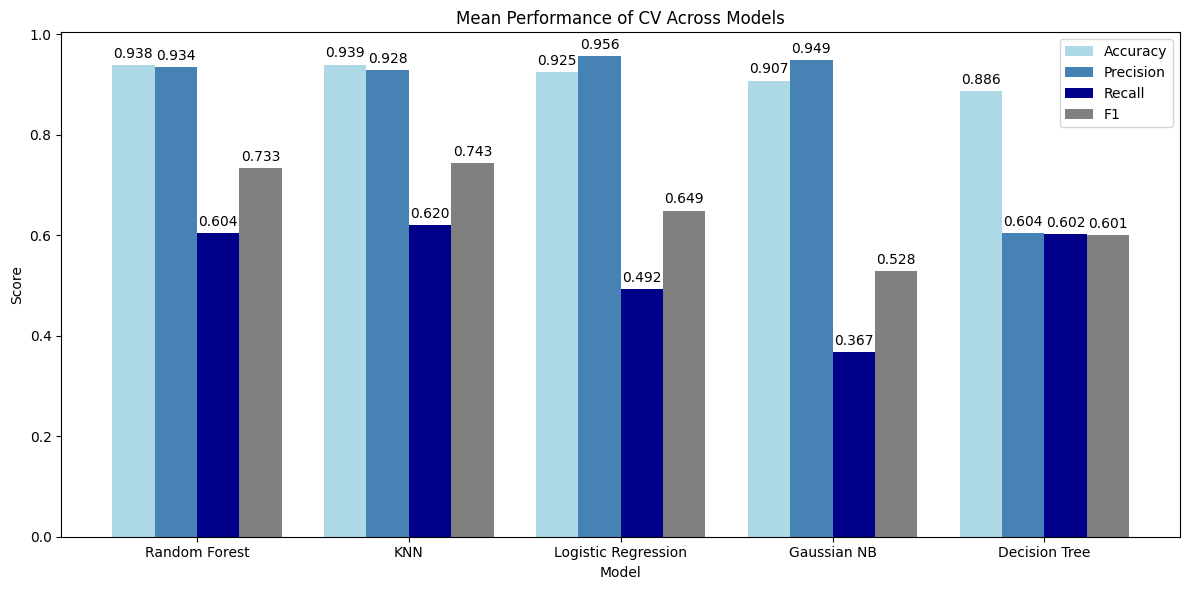

In [108]:
# Collect the scores in a dictionary
scores = {
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1': rf_f1
    },
     'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1': knn_f1
    },
    'Logistic Regression': {
        'Accuracy': logreg_accuracy,
        'Precision': logreg_precision,
        'Recall': logreg_recall,
        'F1': logreg_f1
    },
    'Gaussian NB': {
        'Accuracy': nb_accuracy,
        'Precision': nb_precision,
        'Recall': nb_recall,
        'F1': nb_f1
    },
    'Decision Tree': {
        'Accuracy': dt_accuracy,
        'Precision': dt_precision,
        'Recall': dt_recall,
        'F1': dt_f1
    }

}

# Data preparation for plotting
models = list(scores.keys())
metrics = list(next(iter(scores.values())).keys())
accuracy_scores = [scores[model]['Accuracy'] for model in models]
precision_scores = [scores[model]['Precision'] for model in models]
recall_scores = [scores[model]['Recall'] for model in models]
f1_scores = [scores[model]['F1'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='lightblue')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='steelblue')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='darkblue')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Mean Performance of CV Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [ ]:
## KNN 

In [109]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

In [110]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best hyperparameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}


/Users/owner/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [112]:
# Build the final KNN model using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance with weighted metrics
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score : {test_f1}")
print(f"Final Model Test Precision : {test_precision}")
print(f"Final Model Test Recall : {test_recall}")


Final Model Test Accuracy: 0.9233333333333333
Final Model Test F1 Score : 0.6349206349206349
Final Model Test Precision : 0.8695652173913043
Final Model Test Recall : 0.5


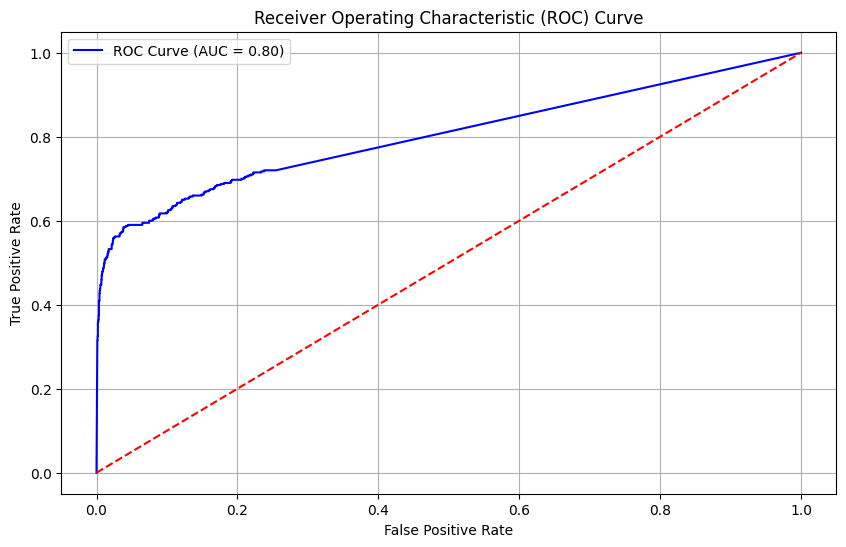

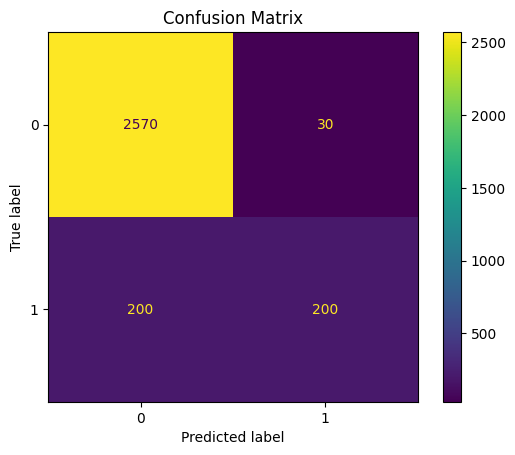

In [113]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic

In [114]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline with a preprocessor and Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimat

Best hyperparameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [115]:
# Build the final Logistic Regression model using the best hyperparameters
final_classifier = LogisticRegression(
    C=grid_search.best_params_['classifier__C'],
    penalty=grid_search.best_params_['classifier__penalty'],
    solver=grid_search.best_params_['classifier__solver'],
    max_iter=1000
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.9283333333333333
Final Model Test F1 Score: 0.6504065040650406
Final Model Test Precision: 0.9302325581395349
Final Model Test Recall: 0.5


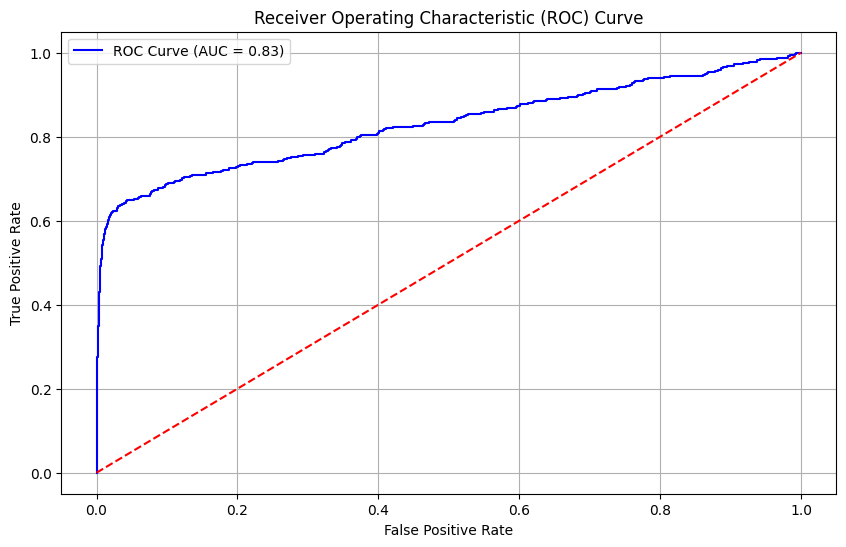

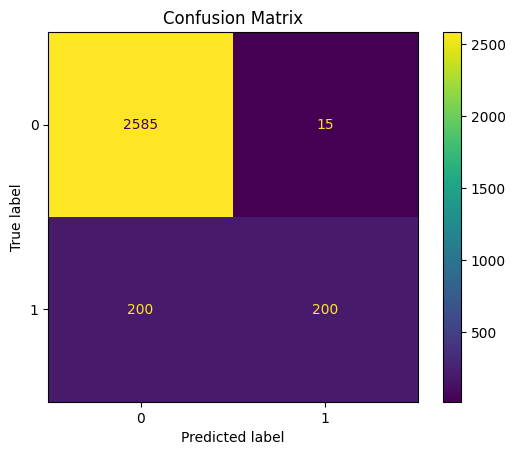

In [117]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
## Naive Bayes 

In [118]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline with a preprocessor and Naive Bayes model
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])


# Define the hyperparameter grid
param_grid = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Naive Bayes:", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for Naive Bayes: {'classifier__var_smoothing': 1e-09}


In [119]:
# Build the final Naive Bayes model using the best hyperparameters
final_classifier = GaussianNB(var_smoothing=grid_search.best_params_['classifier__var_smoothing'])

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8866666666666667
Final Model Test F1 Score: 0.5549738219895288
Final Model Test Precision: 0.5824175824175825
Final Model Test Recall: 0.53


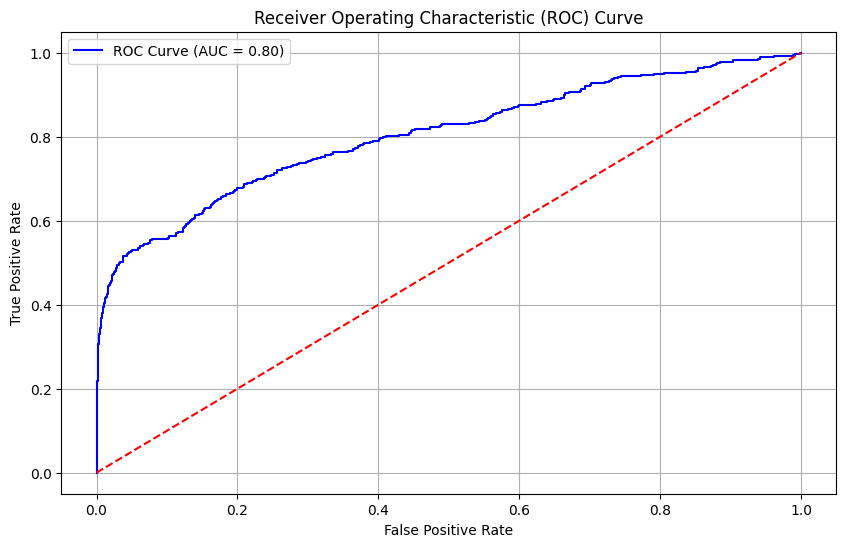

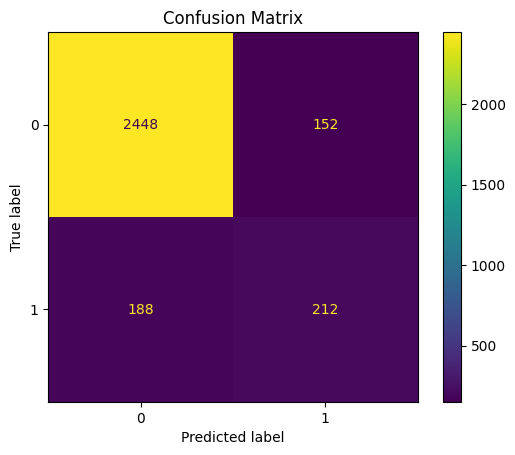

In [120]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##decision tree

In [125]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=123)

# Create a pipeline with a preprocessor and Decision Tree model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

# Define the hyperparameter grid with the correct references to the pipeline steps
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5, 6],
    'classifier__min_samples_split': [8, 10, 15, 20],
    'classifier__min_samples_leaf': [4, 8, 10, 20]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best hyperparameters for Decision Tree: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 20}


/Users/owner/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [126]:
# Build the final Decision Tree model using the best hyperparameters from the new grid
final_dt_classifier = DecisionTreeClassifier(
    max_depth=grid_search_dt.best_params_['classifier__max_depth'],
    min_samples_split=grid_search_dt.best_params_['classifier__min_samples_split'],
    min_samples_leaf=grid_search_dt.best_params_['classifier__min_samples_leaf'],
    random_state=123
)

# Build the final pipeline
final_dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_dt_classifier)
])

# Train the final model
final_dt_pipeline.fit(X_train, y_train)

# Predict on the test set
pred_dt = final_dt_pipeline.predict(X_test)
probs_dt = final_dt_pipeline.predict_proba(X_test)



In [129]:
# Evaluate model performance
dt_test_accuracy = accuracy_score(y_test, pred_dt)
dt_test_f1 = f1_score(y_test, pred_dt)
dt_test_precision = precision_score(y_test, pred_dt)
dt_test_recall = recall_score(y_test, pred_dt)

print(f"Final Decision Tree Model Test Accuracy: {dt_test_accuracy}")
print(f"Final Decision Tree Model Test F1 Score: {dt_test_f1}")
print(f"Final Decision Tree Model Test Precision: {dt_test_precision}")
print(f"Final Decision Tree Model Test Recall: {dt_test_recall}")


Final Decision Tree Model Test Accuracy: 0.9396666666666667
Final Decision Tree Model Test F1 Score: 0.7245053272450532
Final Decision Tree Model Test Precision: 0.9260700389105059
Final Decision Tree Model Test Recall: 0.595


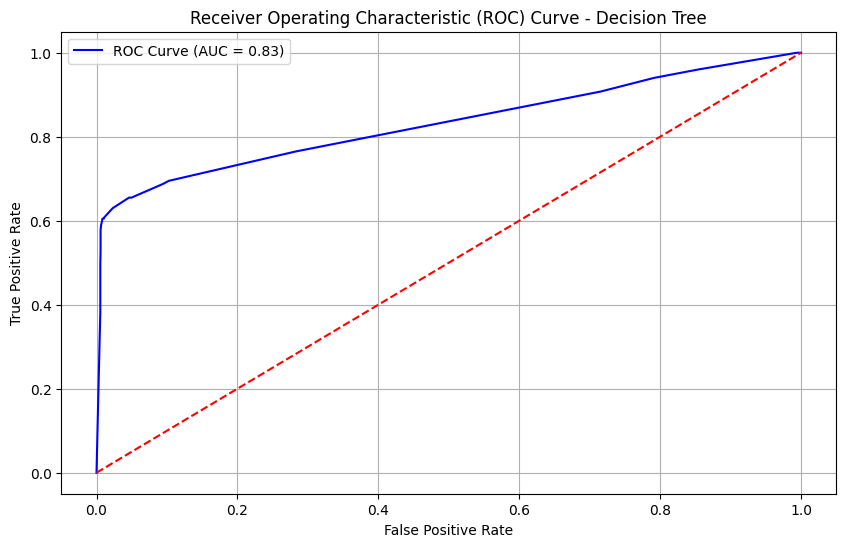

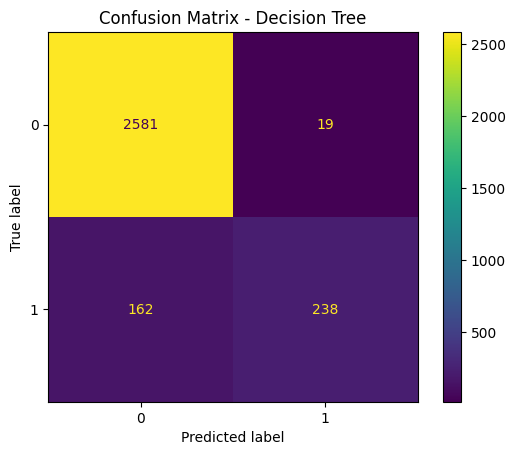

In [130]:
# Calculate ROC curve and AUC score
y_pred_prob_dt = final_dt_pipeline.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt).plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()
